# Tejas Joseph Sunny
## Data Science and Business Analytics Intern at The Sparks Foundation

##                                                Prediction using Supervised ML


In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

# Importing Packages

In [25]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
%matplotlib inline

# Data Retrieval

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

# Data Cleaning and Modification

In [3]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [4]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

Hence, we can see the data has no null values. So, no need for cleaning as the data is already in ready to use condition.

# Data Exploration

In [5]:
data.head() #View the first 5 rows of data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.shape #Knowing the number of columns and rows of the data

(25, 2)

In [7]:
data.describe() # Used for getting to know the data in a better manner

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
data.corr() # used to check the correlation between the columns in a dataset

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Looking at the correlation table we could see that correlation coefficiant is close to 1, hence the regression curve will be a positive linear curve.

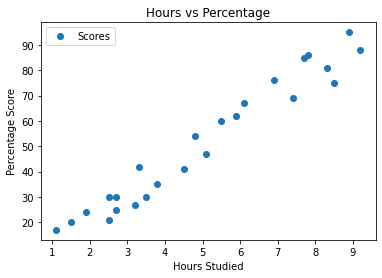

In [9]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

Text(0.5, 1.0, 'Density plot of Target(Score)')

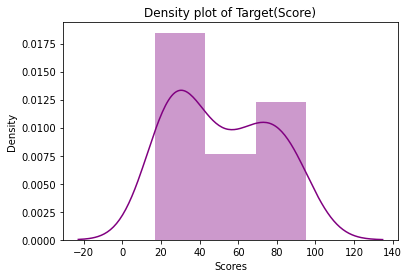

In [23]:
sns.distplot(data['Scores'],color="purple")
plt.title("Density plot of Target(Score)")

# **Preparing the data**

In [10]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values  

In [11]:
X,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=0) 

# **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [13]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


line equation= 9.789*X+2.371


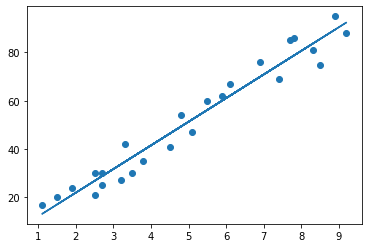

In [14]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
print("line equation= {}*X+{}".format(round(float(regressor.coef_),3),round(regressor.intercept_,3)))
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.show()

In [27]:
print("Train R2_score: ",r2_score(y_train,regressor.predict(X_train)))
print("Test R2_score: ",r2_score(y_test,y_pred))
print("MAE Train:  ",mean_absolute_error(y_train,regressor.predict(X_train)))
print("MAE Test:  ",mean_absolute_error(y_test,y_pred))

Train R2_score:  0.9484997422695115
Test R2_score:  0.9568211104435257
MAE Train:   5.247062033143277
MAE Test:   4.419727808027652


# **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [15]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [16]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [17]:
# You can also test with your own data
hour=9.25
hours = [[hour]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hour))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056


# **Evaluating the model**



In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.419727808027652
